## Simple linear regression

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_squared_error

In [67]:
df = pd.read_csv("../Dataset/height_weight.csv")

In [68]:
df.head()

,Height,Weight
0,120,45
1,135,58
2,123,48
3,145,60
4,160,70


Text(0, 0.5, 'Height')

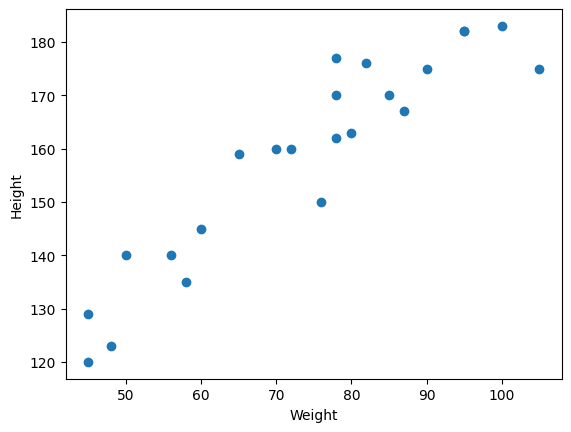

In [69]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')

In [70]:
## Divide dataset into independent and dependent feature
X = df[['Weight']]
y = df[['Height']]

In [71]:
# test size is 25% from full dataset for fiting test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [72]:
## standardise data. for easy converging of cost function. only for independted feature

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

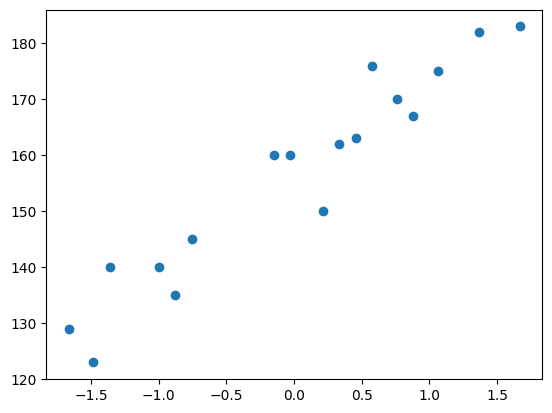

In [73]:
plt.scatter(X_train,y_train)

In [74]:
## Linear Regerssion model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [75]:
linear_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [76]:
linear_model.coef_  # Slope or coefficient of weight

array([[17.2982057]])

In [77]:
linear_model.intercept_     # intercept of model

array([156.47058824])

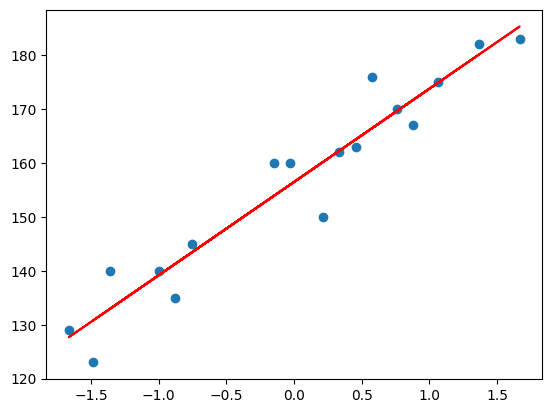

In [78]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear_model.predict(X_train),'r')
# the red line is the hypothetic output

In [79]:
y_pred_test = linear_model.predict(X_test)

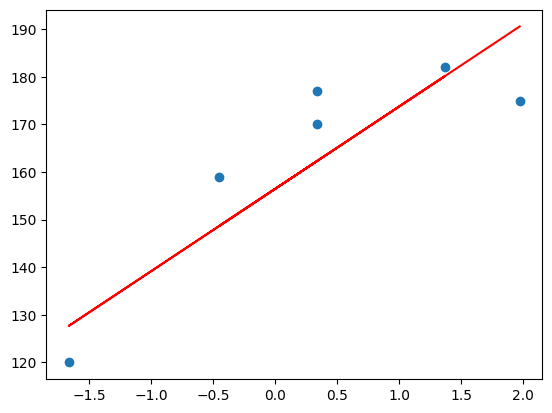

In [80]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

In [81]:
## Perfomance metrics

mse= mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse,'\n',mae,'\n',rmse)

114.84069295228699 
 9.66512588679501 
 10.716374991212605


In [82]:
score = r2_score(y_test,y_pred_test)
score

0.7360826717981276

In [83]:
## new data point

scaled_weight = scaler.transform([[80]])
scaled_weight

d:\KUREETHADOM\JOSEPH K B\Udemy\Krish Naik\Complete data science\ML_NLP_Learning_Codes\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [84]:
linear_model.predict(scaled_weight)

array([[164.36084726]])

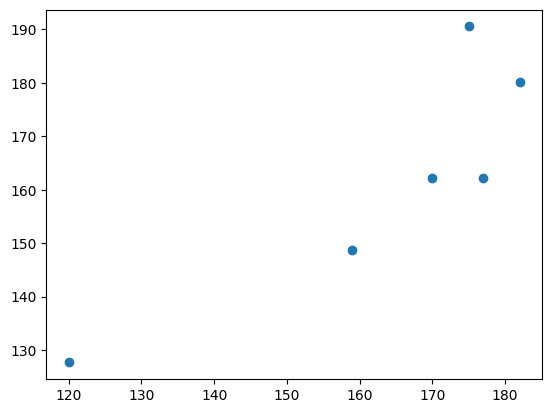

In [85]:
## Assumptions

plt.scatter(y_test,y_pred_test)

C:\Users\kbjos\AppData\Local\Temp\ipykernel_23208\3243818491.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: ylabel='Density'>

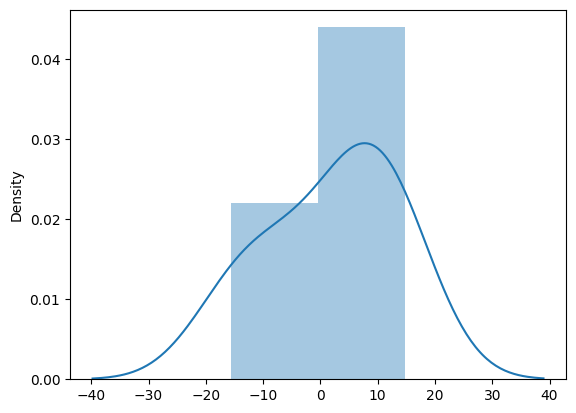

In [86]:
## Residuals   - Difference between ytest and ypredtest, 
residuals = y_test-y_pred_test
sns.distplot(residuals, kde=True)